# Collecting the Data

In [1]:
# DEPENDENCIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import tensorflow as tf
import tensorflow.keras as keras
import os

np.random.seed(42)

In [2]:
print(os.getcwd())

filepath = os.getcwd() + '/cell_images/'

print(filepath)

/Users/sampoad/Documents/Ironhack/data-labs-master/data-labs/final-project
/Users/sampoad/Documents/Ironhack/data-labs-master/data-labs/final-project/cell_images/


# Read in an actual image from the dataset

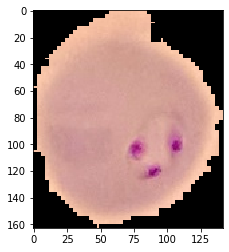

In [3]:
cell_img_array_pos_mal = image.imread('./cell_images/parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

plt.imshow(cell_img_array_pos_mal)

In [4]:
cell_img_array = np.asarray(image.imread('./cell_images/parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'))

In [5]:
cell_img_array.dtype

dtype('float32')

In [6]:
cell_img_array.shape

(163, 142, 3)

In [7]:
cell_img_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

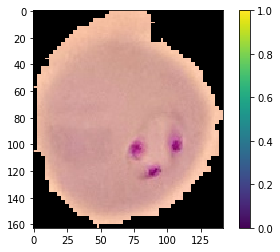

In [8]:
plt.imshow(cell_img_array)
plt.colorbar()

(array([2.0088e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        3.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00,
        5.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00,
        2.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00, 3.0000e+00,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 3.0000e+00,
        3.0000e+00, 2.0000e+00, 3.0000e+00, 0.00

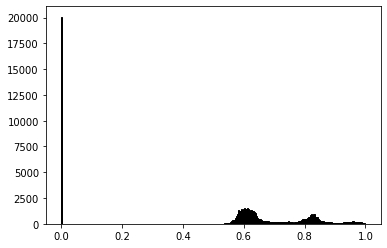

In [9]:
plt.hist(
    cell_img_array.ravel(),
    bins = 256,
    range = (0.0, 1.0),
    fc = 'k',
    ec = 'k',
) # so this shows that there's a high frequency of zeros in the image array

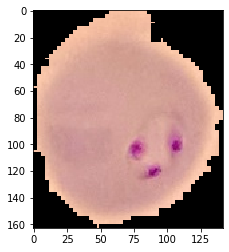

In [10]:
# clip outside the low peaks to have a higher contrast between the peaks
imgplot = plt.imshow(cell_img_array, clim = (0.55, 0.65))
# i don't really see a difference? 

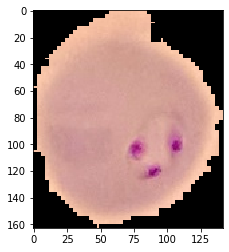

In [11]:
imgplot = plt.imshow(cell_img_array, clim = (0.8, 1.0))
# will have to check the values of the arrays to see if anything actually changed? 

In [12]:
# reshape to determine the total number of values in our array
cell_img_array.reshape(-1, 3).shape

(23146, 3)

# Iterate through my directory of images (one for positive malaria, one for negative)


In [13]:
# quick check to confirm the shape of the images
img_sizes = []

for filename in os.listdir(filepath + 'Parasitized'):
    if filename.endswith('.png'):
        img_size = np.asarray(image.imread(filepath + 'Parasitized/' + filename).shape)
        img_sizes.append(img_size)
    
print(img_sizes[:5]) # so not every image is the same size

[array([115, 112,   3]), array([121, 118,   3]), array([169, 148,   3]), array([106, 136,   3]), array([ 91, 103,   3])]


not every image is the same size. this presents a problem, have to standardize the shape when reading them in



In [23]:
# np.argmax(img_sizes[:][:50])

In [24]:
imagelist = []

for filename in os.listdir(filepath + 'Parasitized'):
    if filename.endswith('.png'):
#         img_array = np.asarray(image.imread(filepath + 'Parasitized/' + filename))
#         rsz_img = np.resize(img_array, (150, 150, 3) )
#         rsz_img = np.resize(np.squeeze(img_array), (175, 175))
#         gray_array = tf.image.rgb_to_grayscale(img_array, name = None)
#         rsz_img = tf.image.resize_with_crop_or_pad(gray_array, 175, 175)
#         rsz_img = tf.image.resize_with_pad(
#             img_array,
#             175, # target_height
#             175, # target_width
# #             method = ResizeMethod.BILINEAR,
#             antialias = False,
#             )
        rsz_img = tf.image.resize_with_pad(
            image.imread(filepath + 'Parasitized/' + filename),
            175,
            175,
        )
    
    imagelist.append((rsz_img))
#     imagelist.append(img_array)


In [25]:
imagelist[0]

<tf.Tensor: shape=(175, 175, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

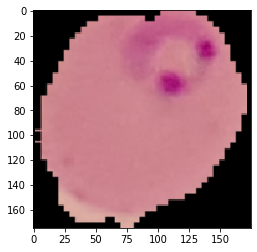

In [26]:
plt.imshow(imagelist[0])

In [28]:
# and then pull out the arrays in the list, 
para_imgs = np.array([np.squeeze(_) for _ in imagelist])

In [27]:
imagelist.shape

AttributeError: 'list' object has no attribute 'shape'

In [29]:
para_imgs.shape

(13780, 175, 175, 3)

In [30]:
para_imgs[0].shape

(175, 175, 3)

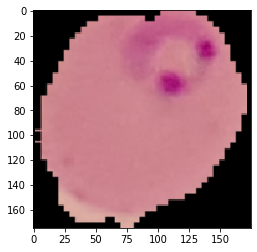

In [31]:
plt.imshow(para_imgs[0])

In [32]:
type(para_imgs)

numpy.ndarray

In [33]:
para_imgs[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

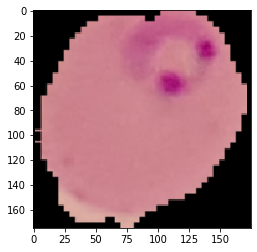

In [34]:
plt.imshow(para_imgs[0])

In [35]:
para_imgs[:5]

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [36]:
len(para_imgs)

13780

In [37]:
150 * 150

22500

In [38]:
print(para_imgs[0])


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [39]:
print(len(para_imgs[0]))

175


In [40]:
para_imgs[0].shape

(175, 175, 3)

In [41]:
set(para_imgs[0].ravel()) # the image arrays are already scaled? how?

{0.0,
 0.042767514,
 0.5749978,
 0.025535943,
 0.02927291,
 0.34332392,
 0.39356646,
 0.8092964,
 0.48089966,
 0.55584776,
 0.8117647,
 0.47843137,
 0.56078434,
 0.8131257,
 0.4797924,
 0.56214535,
 0.57748896,
 0.81187344,
 0.80793875,
 0.5569906,
 0.7483969,
 0.74888515,
 0.63754755,
 0.0093177445,
 0.7625191,
 0.55841756,
 0.81623006,
 0.046615947,
 0.045779575,
 0.5559572,
 0.80008835,
 0.8117976,
 0.5598445,
 0.56570387,
 0.78835064,
 0.8313099,
 0.5676191,
 0.76713,
 0.5093175,
 0.53714955,
 0.78678334,
 0.5636388,
 0.5509435,
 0.80784047,
 0.81772816,
 0.4939977,
 0.810465,
 0.589075,
 0.8019562,
 0.8038998,
 0.82929045,
 0.8077871,
 0.524584,
 0.56754327,
 0.79799306,
 0.5167336,
 0.6319585,
 0.81750536,
 0.63390213,
 0.8155143,
 0.38516727,
 0.1504871,
 0.8076639,
 0.5771857,
 0.58304507,
 0.5537387,
 0.50880736,
 0.8076355,
 0.7998135,
 0.5282946,
 0.431737,
 0.5201121,
 0.5585586,
 0.7760784,
 0.5069323,
 0.5538989,
 0.55753505,
 0.5090822,
 0.802032,
 0.8037008,
 0.54783195

In [42]:
print(len(para_imgs)) # returns 13,780 so what should be my Train_Test_Split amount? 

13780


In [43]:
len(para_imgs) * 0.85 # so the first 11,713 images are my train_X, no, you're failing to account for the uninfected images!!

# so train_y would, in this case, be a list of all ones of the same size.

11713.0

In [44]:
len(para_imgs) * 0.15

2067.0

# Train Test Split the data

### train_X

In [45]:
train_X = para_imgs[:11713] # the first 85% of the parasitized images, 0-11,712

In [46]:
# check the length of train_X, expected 11,713
len(train_X)

11713

In [47]:
type(train_X)

numpy.ndarray

### test_X

In [48]:
test_X = para_imgs[11713:] # the last 15% of the parasitized images, 11,713 to 13,780

In [49]:
# check the length of test_X, expected 2,067
len(test_X)

2067

In [50]:
type(train_X)

numpy.ndarray

### train_y

In [51]:
# create our target array (an array with a specific number of values, all identical value I set)
# np.ones((11713), dtype=int)
# train_y should be 11,713 repeats of the number 1 (for positive malaria)
train_y = np.ones((11713), dtype = int)

train_y


array([1, 1, 1, ..., 1, 1, 1])

In [52]:
# check the length of train_y (expect 11713)
len(train_y)

11713

### test_y

In [53]:
# test_y should be 2,067 repeats of the number 1 (for positive malaria)
test_y = np.ones((2067), dtype = int)

test_y

array([1, 1, 1, ..., 1, 1, 1])

In [54]:
# check the length of test_y (expect 2067)
len(test_y)

2067

In [55]:
type(test_y)

numpy.ndarray

### Read in the non-malaria images

In [58]:
# read in the uninfected images
imagelist = []

for filename in os.listdir(filepath + 'Uninfected'):
    if filename.endswith('.png'):
#         img_array = np.asarray(image.imread(filepath + 'Uninfected/' + filename))
#         rsz_img = np.resize(img_array, (150, 150, 3) )
    
    
        rsz_img = tf.image.resize_with_pad(
            image.imread(filepath + 'Uninfected/' + filename),
            175,
            175,
            )
    
    imagelist.append((rsz_img))
    


In [59]:
# and then pull out the arrays in the list, 
# uninf_imgs = np.array([_ for _ in imagelist])
uninf_imgs = np.array([np.squeeze(_) for _ in imagelist])

In [60]:
# check the length of uninf_imgs (expected 13,780)
len(uninf_imgs)

13780

In [61]:
type(uninf_imgs)

numpy.ndarray

In [62]:
uninf_imgs[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

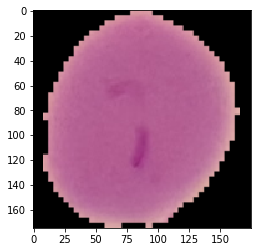

In [63]:
plt.imshow(uninf_imgs[0])

In [173]:
uninf_imgs[:11713]

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.69411767, 0.3647059 , 0.56078434],
         [0.69803923, 0.36862746, 0.5647059 ]

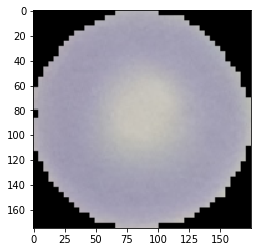

In [64]:
plt.imshow(uninf_imgs[5])

In [65]:
# now do the same type of np.concatenate
train_X = np.concatenate((train_X, uninf_imgs[:11713]), axis = 0)

In [66]:
type(train_X)

numpy.ndarray

In [67]:
len(train_X)

23426

In [68]:
len(uninf_imgs[:11713])

11713

In [69]:
# check the length of train_X (expected 11,713 + 11,713)
len(train_X)

23426

In [70]:
11713 * 2

23426

In [71]:
len(uninf_imgs[11713:])

2067

In [72]:
len(test_X)

2067

In [73]:
# append to test_X the uninf_imgs[11713:]
# test_X = test_X + uninf_imgs[11713:]
# using np.concatenate

test_X = np.concatenate((test_X, uninf_imgs[11713:]), axis = 0)

In [74]:
# check the length of test_X (expected 2,067 + 2,067)
len(test_X)

4134

In [75]:
2067 * 2

4134

In [76]:
len(train_y)

11713

In [77]:
# append to train_y the 11,713 (0-11712) instances of the number 0 (for negative malaria)
train_y = np.concatenate((train_y, np.zeros( 11713, dtype = int)), axis = 0)

In [78]:
# check the length of train_y (expected 11713 + 11713)
len(train_y)

23426

In [79]:
train_y[-1]

0

In [80]:
len(test_y)

2067

In [81]:
# append to test_y the 2,067 (0-2066) instances of the number 0 (for negative malaria)
test_y = np.concatenate((test_y, np.zeros(2067, dtype = int)), axis = 0)

In [82]:
# check the length of test_y (expected 2067 + 2067)
len(test_y)

4134

In [83]:
test_y[-1]

0

In [193]:
# save this for later just in case

# for i, filename in enumerate(os.listdir(filepath + 'Parasitized')):
#     if filename.endswith('.png'):
#         df.append( dict(np.ravel(asarray(image.imread(filepath + 'Parasitized/' + filename)))))
# #         df.loc[i] = np.ravel(asarray(image.imread(filepath + 'Parasitized/' + filename)))
# #         print(i, filename)

# df.head()

In [194]:
#  can I get my original image back? reconvert back from an array? optional inclusion

In [195]:
# in order for the neural network model to work, these lists needs to be arrays?

In [84]:
train_X

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]],


       [[[0., 0., 0.],
         [0., 0., 0.],
         [0., 

In [197]:
a = [[1, 2], [3, 4]]
b = [[5, 6], [7, 8]]

a.append(b)

a # see how this nests array b?

[[1, 2], [3, 4], [[5, 6], [7, 8]]]

In [198]:
a = [[1, 2], [3, 4]]
b = [[5, 6], [7, 8]]

c = np.concatenate((a, b), axis = 0)

print(c)
type(c) # this appears to be what i'm looking for instead.
# so solution would be to go all the way back to when reading in the image arrays to take care of this? items will be numpy arrays from the start, concatenating as we execute the for-loop in the directory.

[[1 2]
 [3 4]
 [5 6]
 [7 8]]


numpy.ndarray

In [199]:
c.ravel()

array([1, 2, 3, 4, 5, 6, 7, 8])

In [85]:
train_X[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [86]:
train_y[0]

1

In [87]:
test_X[0]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [88]:
test_y[0]

1

In [204]:
# this should absolutely not be done, my data is going to be scaled between 0 and 1
# train_X = np.asarray(train_X, dtype = int)
# type(train_X)

In [205]:
# train_y = np.asarray(train_y, dtype = int)
# type(train_y)

In [206]:
# this should absolutely not be done, my data is going to be scaled between 0 and 1
# test_X = np.asarray(test_X, dtype = int) 
# type(test_X)

In [207]:
# test_y = np.asarray(test_y, dtype = int) # why would I have done integers here? b/c test_X would have floats from the np.ones
# type(test_y)

In [89]:
# Built in Normalizer in Keras
# train_X = tf.keras.utils.normalize(train_X, axis = 1)
# test_X = tf.keras.utils.normalize(test_X, axis = 1)

In [90]:
set(train_X[0].ravel())

{0.0,
 0.0043632565,
 0.05833171,
 0.0043031275,
 0.004258778,
 0.057829477,
 0.056998387,
 0.081662595,
 0.0807978,
 0.08018934,
 0.082041435,
 0.0805274,
 0.08114374,
 0.08204912,
 0.08061535,
 0.08118507,
 0.057538856,
 0.040311683,
 0.09153543,
 0.08225808,
 0.013648856,
 0.078840114,
 0.0760325,
 0.079572536,
 0.059212077,
 0.058429588,
 0.05652033,
 0.07789407,
 0.0610088,
 0.07587991,
 0.08430276,
 0.10699258,
 0.089780666,
 0.1218699,
 0.06510602,
 0.14536725,
 0.07151471,
 0.07865464,
 0.07749497,
 0.07761704,
 0.079203956,
 0.08536732,
 0.0856725,
 0.07657826,
 0.07718861,
 0.09385121,
 0.0768224,
 0.08176625,
 0.09250725,
 0.08030022,
 0.08145989,
 0.07779778,
 0.07828606,
 0.084511645,
 0.08725823,
 0.08951653,
 0.07260979,
 0.098610766,
 0.117591515,
 0.08328976,
 0.08237423,
 0.084083214,
 0.080238,
 0.084205285,
 0.11438391,
 0.07706299,
 0.0829834,
 0.07950439,
 0.08371582,
 0.09415283,
 0.07632938,
 0.084202915,
 0.14584842,
 0.08224979,
 0.07736698,
 0.08994022,
 0.08

In [91]:
set(test_X[0].ravel())

{0.0,
 0.03995914,
 0.084199466,
 0.053869717,
 0.043097656,
 0.112508394,
 0.09067323,
 0.08440896,
 0.11328135,
 0.09107759,
 0.0842989,
 0.113202326,
 0.091112964,
 0.08406218,
 0.1128645,
 0.0909831,
 0.051158775,
 0.053985465,
 0.059575904,
 0.03198229,
 0.05843531,
 0.06864724,
 0.09373269,
 0.09629617,
 0.052509654,
 0.056232322,
 0.08970437,
 0.10354409,
 0.07943521,
 0.072919704,
 0.044333804,
 0.041808236,
 0.025709737,
 0.09346566,
 0.08201276,
 0.032940492,
 0.10996686,
 0.0716356,
 0.08927476,
 0.12467515,
 0.09568345,
 0.06937611,
 0.11460316,
 0.0679723,
 0.088846326,
 0.09043324,
 0.08322991,
 0.09000481,
 0.0840844,
 0.07749142,
 0.16764034,
 0.078529015,
 0.058935545,
 0.107702635,
 0.06986084,
 0.07962646,
 0.10111084,
 0.072058104,
 0.115393065,
 0.12650028,
 0.08389774,
 0.09915653,
 0.13699833,
 0.08316532,
 0.09384647,
 0.0765113,
 0.09622566,
 0.11398689,
 0.07474128,
 0.084202826,
 0.08603871,
 0.09462941,
 0.117319226,
 0.090128064,
 0.08062184,
 0.060648084,


In [211]:
# pickle the numpy arrays for later machine learning pipeline!!
# np.save() and np.load()

### Neural Network

##### create the model

In [92]:
# create instance of the Sequential model
model = tf.keras.models.Sequential()

In [93]:
# add the input layer (first, left-most layer)
model.add(tf.keras.layers.Flatten()) # number of neurons in the input layer

In [94]:
# add a DENSE hidden layer
model.add(tf.keras.layers.Dense( # should these be Convolutional? 
    128,
    activation = tf.nn.sigmoid, # possibly tf.nn.relu?
))

In [95]:
# add a second DENSE hidden layer
model.add(tf.keras.layers.Dense(
    128,
    activation = tf.nn.sigmoid, # possibly tf.nn.relu?
))

In [96]:
# add the final output layer
model.add(tf.keras.layers.Dense(
    2,
    activation = tf.nn.softmax, # maps non-normalized output to a prob-distribution
))

##### compile the model

In [97]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
)

##### fit the model

In [98]:
model.fit(train_X, train_y, epochs = 3) # begun 7:45pm


Train on 23426 samples
Epoch 1/3
23426/23426 [==============================] - 40s 2ms/sample - loss: 0.7002 - accuracy: 0.4977
Epoch 2/3
23426/23426 [==============================] - 33s 1ms/sample - loss: 0.6973 - accuracy: 0.5020
Epoch 3/3
23426/23426 [==============================] - 31s 1ms/sample - loss: 0.6974 - accuracy: 0.4957


##### validate the model

In [99]:
val_loss, val_acc = model.evaluate(test_X, test_y)

print(f'Loss: {val_loss}')
print(f'Accuracy: {val_acc}')


4134/4134 [==============================] - 2s 567us/sample - loss: 0.6999 - accuracy: 0.5000
Loss: 0.699870224528458
Accuracy: 0.5


##### save the model

In [126]:
model.save('malaria_deeplearning.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: malaria_deeplearning.model/assets


##### load the saved model

In [127]:
malaria_model = tf.keras.models.load_model('malaria_deeplearning.model')

###### make predictions

In [100]:
# predictions = malaria_model.predict(test_X)
predictions = model.predict(test_X)

predictions[0] # returns a list of probability distributions for each outcome

array([0.4422154, 0.5577846], dtype=float32)

In [101]:
# what's the highest probability? only two options
max(predictions[0])


0.5577846

In [102]:
# does it have malaria or not?
np.argmax(predictions[0]) # and it is 52.5% sure that it has malaria

1

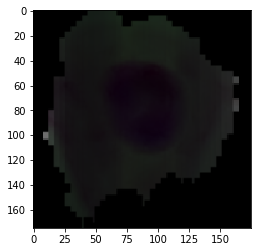

In [103]:
# show the cell for human review
plt.imshow(test_X[0])
# think the reshape is botching my neural network

In [104]:
test_y[0]

1

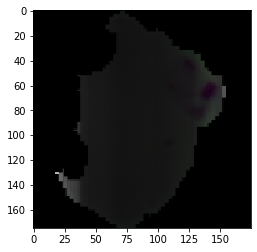

In [105]:
plt.imshow(test_X[5])

In [238]:
test_y[5]

1

In [239]:
np.argmax(predictions[5])

1

In [240]:
predictions[4000]

array([0.42903766, 0.57096237], dtype=float32)

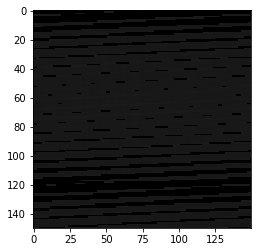

In [241]:
plt.imshow(test_X[4000])

In [242]:
grayscale_test_X = tf.image.rgb_to_grayscale(test_X, name=None)

In [243]:
type(grayscale_test_X)

tensorflow.python.framework.ops.EagerTensor

TypeError: Invalid shape (150, 150, 1) for image data

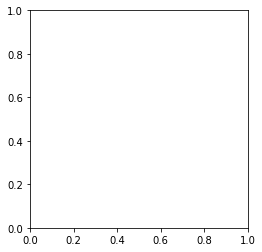

In [245]:
plt.imshow(grayscale_test_X[0])

In [246]:
# shape of the whole array
grayscale_test_X.shape

TensorShape([4134, 150, 150, 1])

In [256]:
# shape of a single image within that array
grayscale_test_X[0].shape

TensorShape([150, 150, 1])

TypeError: Invalid shape (150, 150, 1) for image data

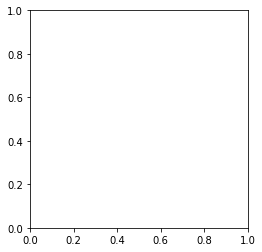

In [253]:
plt.imshow(np.asarray(grayscale_test_X[0]))

In [257]:
np.squeeze(grayscale_test_X[0]).shape # reduce the redundant channel dimension

(150, 150)

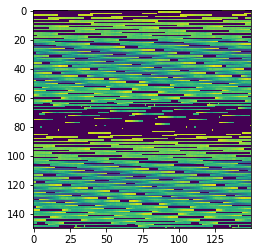

In [255]:
plt.imshow(np.squeeze(np.asarray(grayscale_test_X[0]))) # also appears that my tf module didn't grayscale...

In [248]:
resize_test_X = tf.image.resize_with_crop_or_pad(
    test_X, # image
    175, # target height
    175, # target width
    )

In [249]:
resize_test_X.shape

TensorShape([4134, 175, 175, 3])

In [251]:
resize_test_X[0].shape

TensorShape([175, 175, 3])

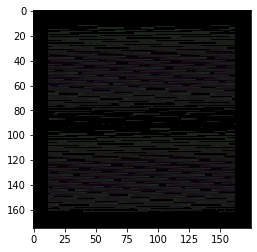

In [252]:
plt.imshow(np.asarray(resize_test_X[0]))

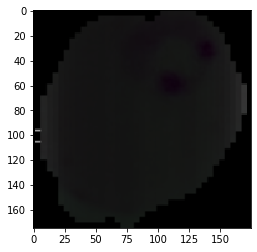

In [106]:
plt.imshow(train_X[0])